# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [7]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [211]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [9]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [10]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 20
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\2220184392.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_main, conn)


In [11]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-13 06:00:00+00:00,20,2019,4,13,7,0,5,2,388.96,0.0,6.0,115.0,12.0,40.0,46.0,342.38,16.8700,441.94,166.95,1
1,2019-04-23 15:00:00+00:00,20,2019,4,23,16,0,1,2,9.38,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
2,2019-04-23 15:30:00+00:00,20,2019,4,23,16,30,1,2,10.35,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
3,2019-04-23 16:00:00+00:00,20,2019,4,23,17,0,1,2,16.79,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
4,2019-04-23 16:30:00+00:00,20,2019,4,23,17,30,1,2,16.98,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,2020-03-30 04:30:00+00:00,20,2020,3,30,5,30,0,2,511.06,NaN,NaN,NaN,NaN,NaN,NaN,608.02,16.3600,570.76,147.54,0
17558,2020-03-30 05:00:00+00:00,20,2020,3,30,6,0,0,2,320.69,NaN,NaN,NaN,NaN,NaN,NaN,586.85,42.6575,635.50,216.76,0
17559,2020-03-30 05:30:00+00:00,20,2020,3,30,6,30,0,2,245.21,NaN,NaN,NaN,NaN,NaN,NaN,524.16,50.5500,616.78,256.78,0
17560,2020-03-30 06:00:00+00:00,20,2020,3,30,7,0,0,2,187.68,NaN,NaN,NaN,NaN,NaN,NaN,458.60,28.3925,428.11,144.64,0


In [12]:
df_main = df_main[['timestamp','net_load','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration']]
df_main

,timestamp,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
0,2019-04-13 06:00:00+00:00,388.96,4,13,7,5,2,342.38,1,40.0,46.0
1,2019-04-23 15:00:00+00:00,9.38,4,23,16,1,2,-27.63,0,NaN,NaN
2,2019-04-23 15:30:00+00:00,10.35,4,23,16,1,2,-24.74,0,NaN,NaN
3,2019-04-23 16:00:00+00:00,16.79,4,23,17,1,2,5.20,0,NaN,NaN
4,2019-04-23 16:30:00+00:00,16.98,4,23,17,1,2,28.17,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17557,2020-03-30 04:30:00+00:00,511.06,3,30,5,0,2,608.02,0,NaN,NaN
17558,2020-03-30 05:00:00+00:00,320.69,3,30,6,0,2,586.85,0,NaN,NaN
17559,2020-03-30 05:30:00+00:00,245.21,3,30,6,0,2,524.16,0,NaN,NaN
17560,2020-03-30 06:00:00+00:00,187.68,3,30,7,0,2,458.60,0,NaN,NaN


### Convert Convert 'ts' to datetime and set as index

### Normalise net_load

In [13]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\3960147717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.rename(columns={'timestamp':'ts'},inplace=True)
C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\3960147717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['ts'] = pd.to_datetime(df_main['ts'])
C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\3960147717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,152.86,0,0.0,0.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,204.52,0,0.0,0.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,214.66,0,0.0,0.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,209.72,0,0.0,0.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,230.59,0,0.0,0.0


C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\600009085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
C:\Users\Zóra\AppData\Local\Temp\ipykernel_22816\600009085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.drop('net_load',axis=1,inplace=True)


<Axes: xlabel='ts'>

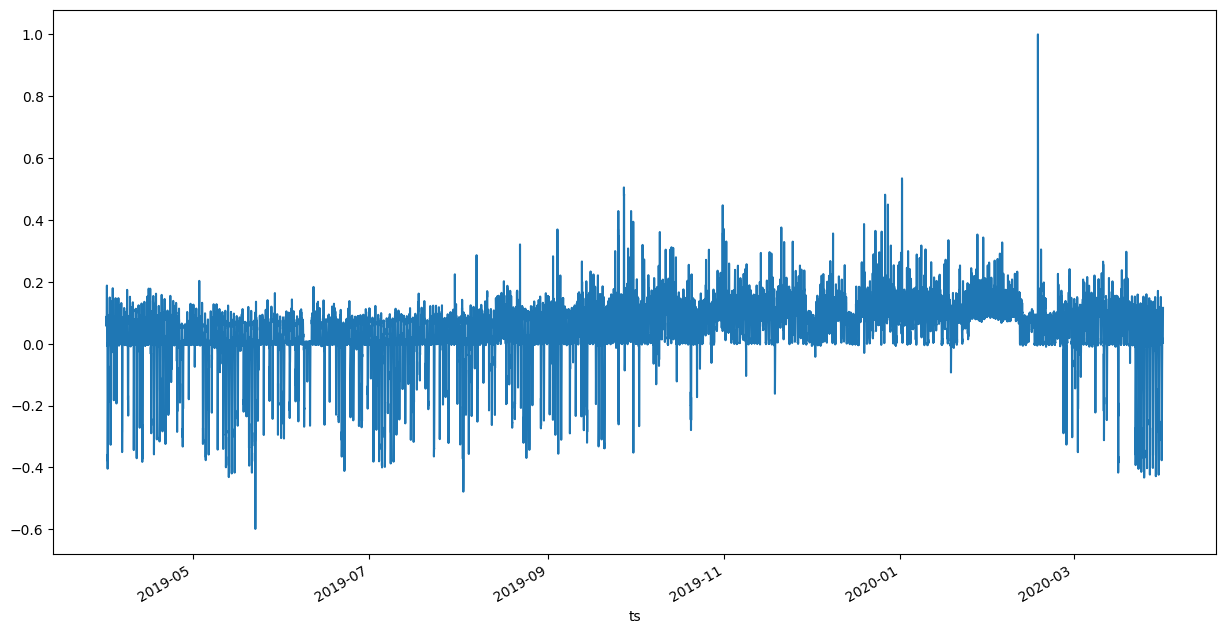

In [14]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)

plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [15]:
df_main.head()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm
ts,,,,,,,,,,
2019-04-01 00:00:00+00:00,4,1,1,0,2,152.86,0,0.0,0.0,0.066453
2019-04-01 00:30:00+00:00,4,1,1,0,2,204.52,0,0.0,0.0,0.083742
2019-04-01 01:00:00+00:00,4,1,2,0,2,214.66,0,0.0,0.0,0.064875
2019-04-01 01:30:00+00:00,4,1,2,0,2,209.72,0,0.0,0.0,0.082010
2019-04-01 02:00:00+00:00,4,1,3,0,2,230.59,0,0.0,0.0,0.074773


### Creating function for lagged net_load

In [16]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,
2019-04-03 00:00:00+00:00,4,3,1,2,2,263.41,0,0.0,0.0,0.090284,0.058186,0.013331,0.004677,0.004540,0.003594,0.057507,0.066453
2019-04-03 00:30:00+00:00,4,3,1,2,2,335.42,0,0.0,0.0,0.062582,0.090284,0.058186,0.013331,0.004677,0.004540,0.093222,0.083742
2019-04-03 01:00:00+00:00,4,3,2,2,2,326.50,0,0.0,0.0,0.067512,0.062582,0.090284,0.058186,0.013331,0.004677,0.089776,0.064875
2019-04-03 01:30:00+00:00,4,3,2,2,2,323.05,0,0.0,0.0,0.065470,0.067512,0.062582,0.090284,0.058186,0.013331,0.069652,0.082010
2019-04-03 02:00:00+00:00,4,3,3,2,2,358.56,0,0.0,0.0,0.075509,0.065470,0.067512,0.062582,0.090284,0.058186,0.076010,0.074773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29 20:30:00+00:00,3,29,21,6,2,319.19,1,0.0,0.0,0.004503,0.004623,0.003634,0.003510,0.003386,0.004530,0.004386,0.006776
2020-03-29 21:00:00+00:00,3,29,22,6,2,284.94,1,0.0,0.0,0.004122,0.004503,0.004623,0.003634,0.003510,0.003386,0.003099,0.007338
2020-03-29 21:30:00+00:00,3,29,22,6,2,261.92,1,0.0,0.0,0.091033,0.004122,0.004503,0.004623,0.003634,0.003510,0.003092,0.007154


In [17]:
[ - 1 - lag for lag in lags]

[-2, -3, -4, -5, -6, -49, -97]

#### Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [18]:
# Identify the time point for initial_ts
#Identify the start and end points for creating an initial time series to use in rolling predictions. 
#Select a subset of df_lagge to be the set of data that the rolling prediction function will use to start making predictions


end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours / Should i not be using 36 hours?

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create initial_ts for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [19]:
initial_ts

ts
2020-03-28 22:30:00+00:00    0.104464
2020-03-28 23:00:00+00:00    0.081215
2020-03-28 23:30:00+00:00    0.107908
2020-03-29 02:00:00+00:00    0.088549
2020-03-29 02:30:00+00:00    0.104665
2020-03-29 03:00:00+00:00    0.090829
2020-03-29 03:30:00+00:00    0.073292
2020-03-29 04:00:00+00:00    0.104678
2020-03-29 04:30:00+00:00    0.110916
2020-03-29 05:00:00+00:00    0.150977
2020-03-29 05:30:00+00:00    0.075726
2020-03-29 06:00:00+00:00    0.027311
2020-03-29 06:30:00+00:00   -0.001190
2020-03-29 07:00:00+00:00    0.110589
2020-03-29 07:30:00+00:00    0.034682
2020-03-29 08:00:00+00:00    0.003717
2020-03-29 08:30:00+00:00   -0.002985
2020-03-29 09:00:00+00:00   -0.023467
2020-03-29 09:30:00+00:00   -0.018600
2020-03-29 10:00:00+00:00   -0.036972
2020-03-29 10:30:00+00:00   -0.138130
2020-03-29 11:00:00+00:00   -0.428207
2020-03-29 11:30:00+00:00   -0.415447
2020-03-29 12:00:00+00:00   -0.392977
2020-03-29 12:30:00+00:00   -0.386512
2020-03-29 13:00:00+00:00   -0.358264
2020-03-2

### Define features and target, train and test

In [20]:
features = ['net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3', 'net_load_lag_4', 'net_load_lag_5', 
            'net_load_lag_48', 'net_load_lag_96', 'month', 'day', 'hour', 'day_of_week', 'season', 
            'avg_net_load', 'weekend_or_bank_holiday', 'solar_radiation', 'sunshine_duration']


In [21]:
# Define features and target
#X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
#X = df_lagged['net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3', 'net_load_lag_4', 'net_load_lag_5', 'net_load_lag_48', 'net_load_lag_96', 'month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration']
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

In [77]:
test_target.shape

(72,)

In [76]:
train_features.shape
#test_target.shape

(16900, 16)

### Model definition and training 

In [61]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

### Create get_input function 
### Version 2 - to include weather features

In [23]:
# Define the additional features (excluding the lagged net load)
# additional_features = ['month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load', 'weekend_or_bank_holiday', 'solar_radiation', 'sunshine_duration']

In [43]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-03-28 06:30:00+00:00    0.000157
2020-03-28 07:00:00+00:00    0.033178
2020-03-28 07:30:00+00:00    0.023714
2020-03-28 08:00:00+00:00   -0.007692
2020-03-28 08:30:00+00:00    0.006010
Name: net_load_norm, Length: 16900, dtype: float64

In [45]:
train_target.iloc[[ - 1 - lag for lag in lags]].values.reshape(1, -1)

array([[-0.00769192,  0.02371425,  0.03317789,  0.00015711,  0.00026074,
        -0.00882181, -0.00370389]])

In [51]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-03-28 06:30:00+00:00    0.000157
2020-03-28 07:00:00+00:00    0.033178
2020-03-28 07:30:00+00:00    0.023714
2020-03-28 08:00:00+00:00   -0.007692
2020-03-28 08:30:00+00:00    0.006010
Name: net_load_norm, Length: 16900, dtype: float64

In [53]:
def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

#def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    # positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    # return ts.iloc[positions].values.reshape(1, -1)

In [25]:
print(train_target.tail())
print(train_target.iloc[-2])
print(get_input(train_target, lags))

ts
2020-03-28 06:30:00+00:00    0.000157
2020-03-28 07:00:00+00:00    0.033178
2020-03-28 07:30:00+00:00    0.023714
2020-03-28 08:00:00+00:00   -0.007692
2020-03-28 08:30:00+00:00    0.006010
Name: net_load_norm, dtype: float64
-0.007691921977636336
[[-0.00769192  0.02371425  0.03317789  0.00015711  0.00026074 -0.00882181
  -0.00370389]]


In [105]:
df_lagged.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,
2020-03-29 20:30:00+00:00,3,29,21,6,2,319.19,1,0.0,0.0,0.004503,0.004623,0.003634,0.003510,0.003386,0.004530,0.004386,0.006776
2020-03-29 21:00:00+00:00,3,29,22,6,2,284.94,1,0.0,0.0,0.004122,0.004503,0.004623,0.003634,0.003510,0.003386,0.003099,0.007338
2020-03-29 21:30:00+00:00,3,29,22,6,2,261.92,1,0.0,0.0,0.091033,0.004122,0.004503,0.004623,0.003634,0.003510,0.003092,0.007154
2020-03-29 22:00:00+00:00,3,29,23,6,2,216.09,1,0.0,0.0,0.104421,0.091033,0.004122,0.004503,0.004623,0.003634,0.091320,0.044343
2020-03-29 22:30:00+00:00,3,29,23,6,2,175.28,1,0.0,0.0,0.096622,0.104421,0.091033,0.004122,0.004503,0.004623,0.128937,0.137402


In [108]:
df_test = df_lagged.drop(df_lagged.columns[df_lagged.columns.str.startswith('net_load_lag')], axis = 1)

In [110]:
df_test.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,net_load_norm
ts,,,,,,,,,,
2020-03-29 20:30:00+00:00,3,29,21,6,2,319.19,1,0.0,0.0,0.004503
2020-03-29 21:00:00+00:00,3,29,22,6,2,284.94,1,0.0,0.0,0.004122
2020-03-29 21:30:00+00:00,3,29,22,6,2,261.92,1,0.0,0.0,0.091033
2020-03-29 22:00:00+00:00,3,29,23,6,2,216.09,1,0.0,0.0,0.104421
2020-03-29 22:30:00+00:00,3,29,23,6,2,175.28,1,0.0,0.0,0.096622


In [111]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-03-28 06:30:00+00:00    0.000157
2020-03-28 07:00:00+00:00    0.033178
2020-03-28 07:30:00+00:00    0.023714
2020-03-28 08:00:00+00:00   -0.007692
2020-03-28 08:30:00+00:00    0.006010
Name: net_load_norm, Length: 16900, dtype: float64

In [115]:
get_input(train_target, lags)[0]# + [df_lagged.columns[df_lagged.columns.str.startswith('net_load_lag')]]

array([-0.00769192,  0.02371425,  0.03317789,  0.00015711,  0.00026074,
       -0.00882181, -0.00370389])

In [26]:
#input_features = get_input(train_target, lags)
#pred = rf.predict(input_features)
#print(input_features)
#print(pred)

In [27]:
initial_ts

ts
2020-03-28 22:30:00+00:00    0.104464
2020-03-28 23:00:00+00:00    0.081215
2020-03-28 23:30:00+00:00    0.107908
2020-03-29 02:00:00+00:00    0.088549
2020-03-29 02:30:00+00:00    0.104665
2020-03-29 03:00:00+00:00    0.090829
2020-03-29 03:30:00+00:00    0.073292
2020-03-29 04:00:00+00:00    0.104678
2020-03-29 04:30:00+00:00    0.110916
2020-03-29 05:00:00+00:00    0.150977
2020-03-29 05:30:00+00:00    0.075726
2020-03-29 06:00:00+00:00    0.027311
2020-03-29 06:30:00+00:00   -0.001190
2020-03-29 07:00:00+00:00    0.110589
2020-03-29 07:30:00+00:00    0.034682
2020-03-29 08:00:00+00:00    0.003717
2020-03-29 08:30:00+00:00   -0.002985
2020-03-29 09:00:00+00:00   -0.023467
2020-03-29 09:30:00+00:00   -0.018600
2020-03-29 10:00:00+00:00   -0.036972
2020-03-29 10:30:00+00:00   -0.138130
2020-03-29 11:00:00+00:00   -0.428207
2020-03-29 11:30:00+00:00   -0.415447
2020-03-29 12:00:00+00:00   -0.392977
2020-03-29 12:30:00+00:00   -0.386512
2020-03-29 13:00:00+00:00   -0.358264
2020-03-2

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [203]:
df_other_features = train_features.drop(train_features.columns[train_features.columns.str.startswith('net_load_lag')], axis = 1)

In [198]:
def get_input_new(target_ts, other_features, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return np.concatenate((target_ts.iloc[positions], other_features.iloc[-1]), axis = 0).reshape(1, -1)

In [212]:
def rolling_window_predictions(model, full_series, other_features, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0, n): # Iterate over the test set to predict one step ahead each time

        input_features = get_input_new(initial_ts, other_features, lags)#.reshape(1, -1) # Get the input features for the current prediction

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
    
    return predictions

# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [213]:
###################### Old model
# def rolling_window_predictions(model, full_series, n, lags):
    
#     initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
#     predictions = []  # Store out-of-sample predictions
    
#     for i in range(0, n): # Iterate over the test set to predict one step ahead each time
#         input_features = get_input(initial_ts, lags).reshape(1, -1) # Get the input features for the current prediction
        
#         # model.fit(input_features, input_target)

#         pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
#         predictions.append(pred)
        
#         # Append the actual observed value to roll the window forward
#         initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
    
#     return predictions

# # predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [231]:
predicted_values = rolling_window_predictions(rf, train_target, other_features = df_other_features, n = 36, lags=[1,2,3,4,5,48,96])
# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [232]:
len(predicted_values)

72

In [233]:
predicted_values

[0.003968543682829398,
 0.09969462969462961,
 0.004189506760935329,
 0.08103983018268733,
 0.002694345551488409,
 0.051374684517541666,
 0.003699677413963128,
 0.04483815540958399,
 -0.0004483444483444482,
 0.03799628942486085,
 0.00577195005766434,
 0.022510922796637085,
 -0.0016538802253087952,
 0.012514700228985936,
 0.006756957328385897,
 0.00659703488274917,
 0.004624680338966053,
 0.00568851225994083,
 -0.0004609470323756087,
 0.004366878938307512,
 0.000257567400424542,
 -4.556318842033144e-05,
 0.0030584833441976277,
 0.0008202711059853906,
 0.0006031523174380324,
 0.0005661134232562822,
 0.0007907870765013605,
 0.0010219793076935914,
 0.0014705243276671848,
 0.0003023283023283007,
 -0.0002733122733122732,
 0.001766367480653193,
 -0.000785003927861073,
 0.0005504354075782645,
 -0.0005683197111768554,
 0.0022608434037005454,
 -0.000560631132059705,
 9.654181082752593e-05,
 -0.0006671346671346688,
 0.0018815290243861672,
 0.00034876063447491807,
 0.0009693626836483982,
 0.0007141

## Trying to implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [234]:
# Define features and target
# X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-2160]
train_target = y.iloc[:-2160]

test_target = y.iloc[-2160:]
test_features = X.iloc[-2160:]


In [235]:
test_target

ts
2020-02-12 21:00:00+00:00    0.082305
2020-02-12 21:30:00+00:00    0.076294
2020-02-12 22:00:00+00:00    0.073737
2020-02-12 22:30:00+00:00    0.074639
2020-02-12 23:00:00+00:00    0.057781
                               ...   
2020-03-29 20:30:00+00:00    0.004503
2020-03-29 21:00:00+00:00    0.004122
2020-03-29 21:30:00+00:00    0.091033
2020-03-29 22:00:00+00:00    0.104421
2020-03-29 22:30:00+00:00    0.096622
Name: net_load_norm, Length: 2160, dtype: float64

In [236]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

In [237]:
def nested_prediction_model(model, input_ts, other_features, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        
        # Make predictions for the current day
        pred_day = rolling_window_predictions(model, ts, other_features, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day)

        # update true values
        true_values = true_data[day*n_steps : (day+1)*n_steps]

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the predicted values

    return full_predictions



In [238]:
full_predictions=nested_prediction_model(rf, train_target, df_other_features, test_target, 72, 30, lags=[1,2,3,4,5,48,96])
full_predictions

[0.005007103578532146,
 0.09506012134583562,
 0.005618479332765045,
 0.07479700479700481,
 0.007961657390228815,
 0.02808086379514951,
 -0.004165772451486734,
 0.011670895385181103,
 0.0028333416904845476,
 0.006571796286082,
 0.007855254140968425,
 0.007940497083354224,
 0.0019355830784402181,
 0.003878955021812165,
 -0.0018938307509736105,
 0.007019773019773018,
 0.0009719701148272583,
 0.009176085176085173,
 0.0030118838690267272,
 0.0025938257366828793,
 -0.004391482391482393,
 0.0014823914823914818,
 -0.0045360611074896804,
 -0.003471828043256614,
 -0.0019857259857259863,
 -0.001982383125240269,
 -0.000702836417122131,
 -0.0019144227715656278,
 -0.0017952497952497934,
 -0.0021976633405204828,
 -0.0029088569088569095,
 -0.0006162229019371894,
 -0.0011009711009710998,
 -0.000749068177639606,
 -0.0009407143692857986,
 -0.0007815607815607805,
 -2.8481171338312974e-05,
 -0.0007345267345267334,
 0.002806331377759953,
 -0.00023018937304651377,
 -0.0031738120309548878,
 0.0028880977452406

In [239]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [240]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [241]:
len(test_target)

2160

In [242]:
len(train_target)

14812

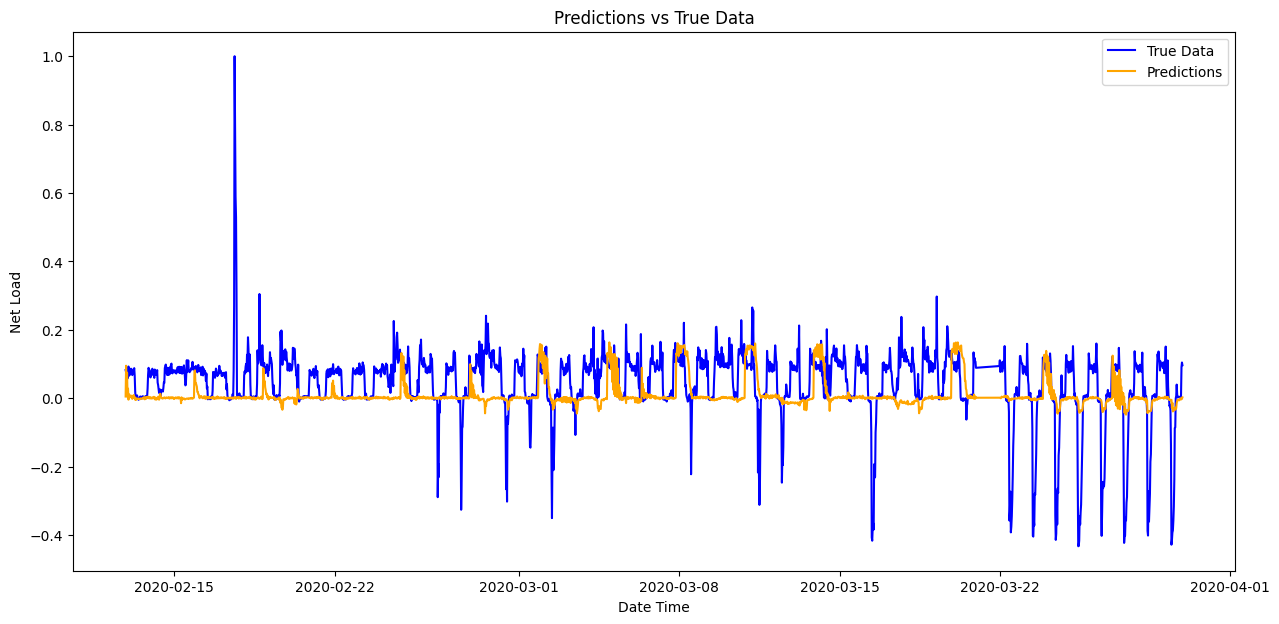

In [243]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()

In [ ]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-02-12 18:30:00+00:00    0.003363
2020-02-12 19:00:00+00:00    0.004657
2020-02-12 19:30:00+00:00    0.006057
2020-02-12 20:00:00+00:00    0.006438
2020-02-12 20:30:00+00:00    0.068863
Name: net_load_norm, Length: 14812, dtype: float64

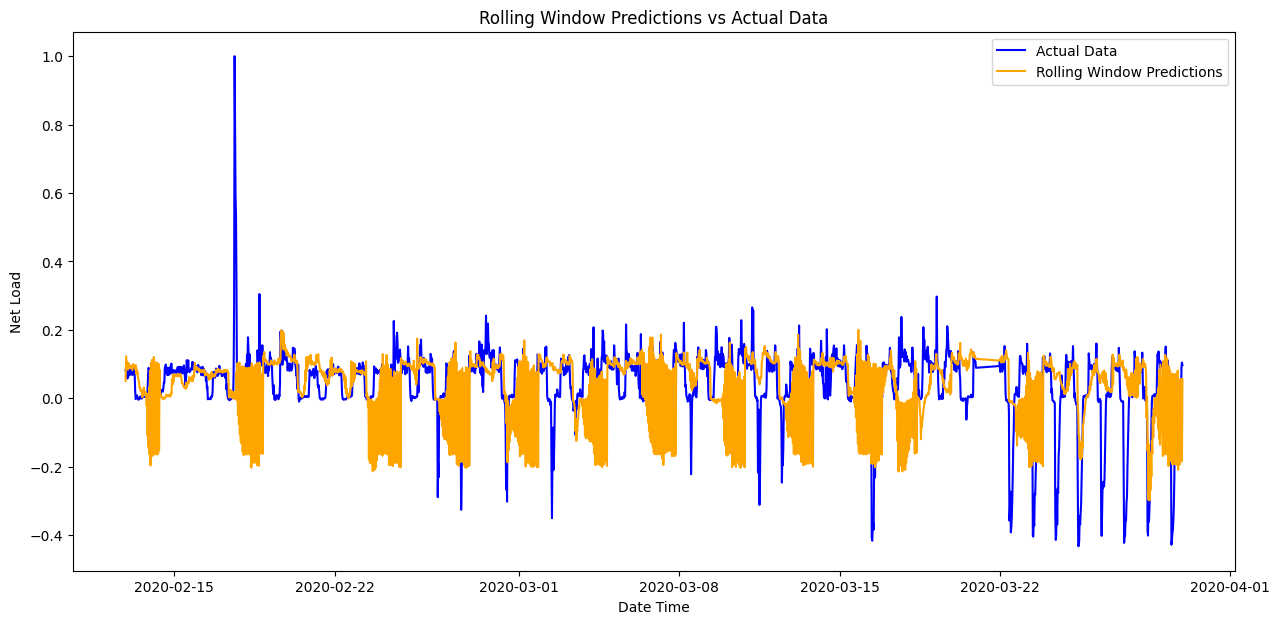

In [ ]:
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()

## Ieration where model is updated the prediction point every 30 minutes 
### (as opposed to the 24 hours daily loop)

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of updates based on the update interval
    n_updates = len(true_data) // update_interval

    for update in range(n_updates):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Determine the index for updating ts with true values or predictions
        update_idx = min((update + 1) * update_interval, len(true_data))

        # Update ts with the true value if available, otherwise use the predicted value
        next_values = true_data[update * update_interval : update_idx]
        ts = pd.concat([ts, next_values]) if not next_values.empty else pd.concat([ts, pd.Series(pred_day[:update_interval])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, update_interval, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the total number of updates
    n_updates = (len(true_data) - n_steps) // update_interval + 1

    for update in range(n_updates):
        if (update + 1) * update_interval + n_steps > len(true_data):
            break  # Break if the next slice would be out of bounds

        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        full_predictions.append(pred_day[0])

        update_idx = (update + 1) * update_interval
        next_values = true_data[update * update_interval : min(update_idx, len(true_data))]

        if not next_values.empty:
            ts = pd.concat([ts, next_values])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
full_predictions = nested_prediction_model_30min(rf, train_target, test_target, 72, 1, lags=[1,2,3,4,5,48,96])


C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

IndexError: positional indexers are out-of-bounds

In [ ]:
def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):
    full_predictions = []
    ts = input_ts.copy()

    # Calculate the number of 30-min intervals in the test period
    n_intervals = len(true_data) - n_steps + 1

    for interval in range(n_intervals):
        # Generate predictions for the next 36 hours
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)
        
        # Store the first prediction (next 30 minutes) and discard the rest
        full_predictions.append(pred_day[0])

        # Update ts with the true value if available, otherwise use the predicted value
        if interval < n_intervals - 1:
            true_value = true_data[interval : interval + 1].values
            ts = pd.concat([ts, pd.Series(true_value)])
        else:
            ts = pd.concat([ts, pd.Series(pred_day[0])])

        # Ensure ts is the correct length for the next prediction
        ts = ts.tail(max(lags))

    return full_predictions

In [ ]:
#def nested_prediction_model_30min(model, input_ts, true_data, n_steps, lags):

full_predictions=nested_prediction_model_30min(rf, train_target, test_target, 72, lags=[1,2,3,4,5,48,96])

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

IndexError: positional indexers are out-of-bounds

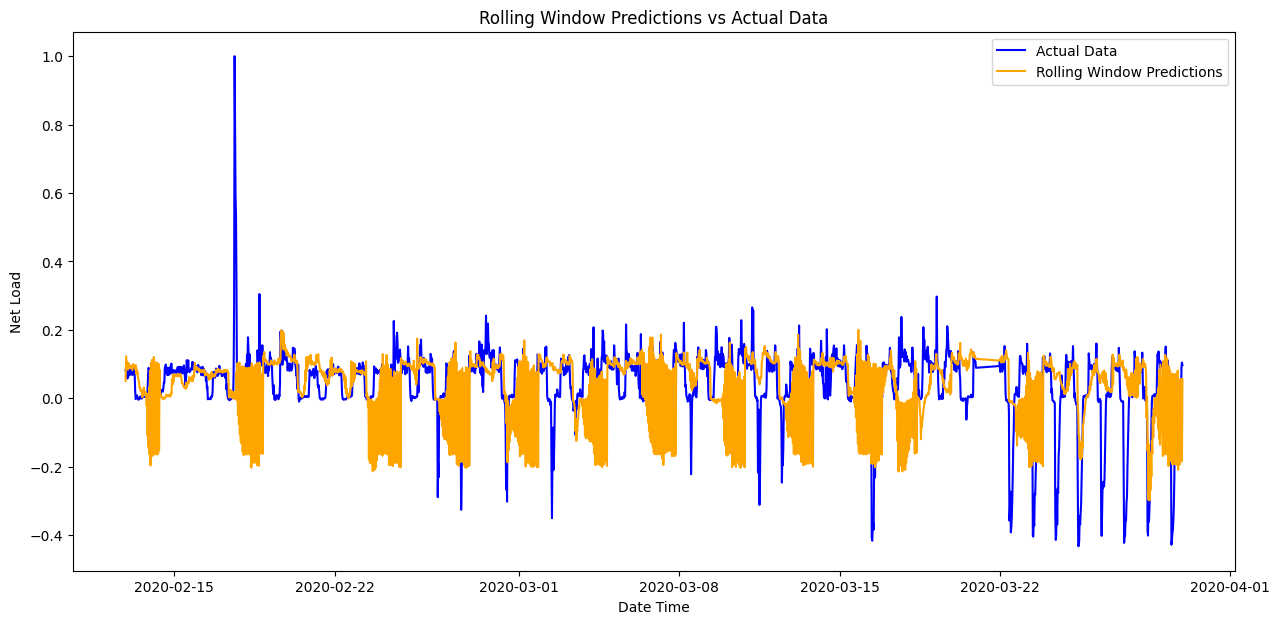

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()
